<a href="https://colab.research.google.com/github/Gayathhhrii/Machine_Learning/blob/main/BOOTSIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dataset=pd.read_csv('input.csv')

In [ ]:
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula = "boot_size ~ harness_size"

In [ ]:
model=smf.ols(formula=formula , data=dataset)

In [ ]:
if not hasattr(model,'params'):
    print("model is selected but it doesnt have parameters set. we need to train it!" )

model is selected but it doesnt have parameters set. we need to train it!


In [ ]:
fitted_model=model.fit()

In [ ]:
print("the following parameters have been found:\n"+
      f"line slope: {fitted_model.params[1]}\n"+
      f"Line Intercept: {fitted_model.params[0]}")

the following parameters have been found:
line slope: 0.585925416738271
Line Intercept: 5.71910981268259


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
harness_size={'harness_size':[58]}
approximate_bootsize = fitted_model.predict(harness_size)
print(approximate_bootsize)

0    39.702784
dtype: float64


In [ ]:
approximate_size= fitted_model.predict(dataset["harness_size"])

In [ ]:
print("estimated boot size is:")
print(approximate_bootsize)

estimated boot size is:
0    39.702784
dtype: float64


In [ ]:
import numpy as np


In [ ]:
from sklearn import metrics

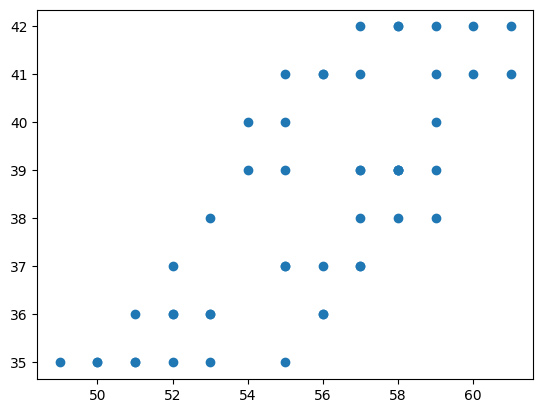

In [ ]:
plt.scatter(dataset['harness_size'],dataset['boot_size'])

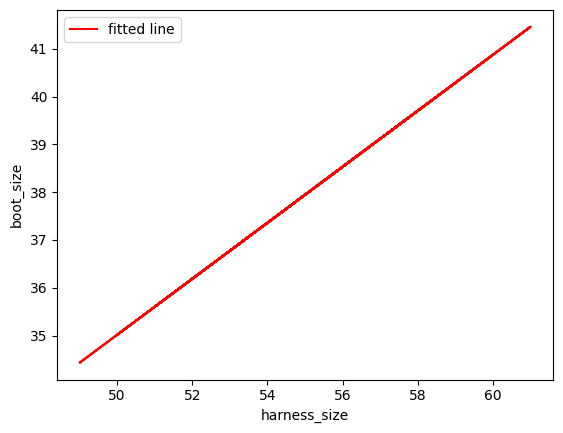

In [ ]:
plt.plot(dataset["harness_size"], fitted_model.params[1]*dataset["harness_size"] + fitted_model.params[0], 'r', label = "fitted line")
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

In [ ]:
x= dataset["harness_size"]
y= dataset["boot_size"]

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y,approximate_size))
print('RMSE:',rmse)

RMSE: 1.5560397381202649


In [ ]:
print("average cost:", y.mean)

average cost: <bound method NDFrame._add_numeric_operations.<locals>.mean of 0     39
1     38
2     37
3     39
4     38
5     35
6     37
7     36
8     35
9     40
10    40
11    36
12    38
13    39
14    42
15    42
16    36
17    36
18    35
19    41
20    42
21    38
22    37
23    35
24    40
25    36
26    35
27    39
28    41
29    37
30    35
31    41
32    39
33    41
34    42
35    42
36    36
37    37
38    37
39    39
40    42
41    35
42    36
43    41
44    41
45    41
46    39
47    39
48    35
49    39
Name: boot_size, dtype: int64>


In [ ]:
print("R-squared", metrics.r2_score(y,approximate_size))

R-squared 0.5689868152575153
